In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Importation of the dataset
import pandas as pd
curve_trx_from_to_path = 'curve_trx_from_to.csv'  
veCRV_20holders_path = 'veCRV_20holders.csv'      
curve_trx_from_to = pd.read_csv(curve_trx_from_to_path)
veCRV_20holders = pd.read_csv(veCRV_20holders_path)

C:\Users\Badr\AppData\Local\Temp\ipykernel_10056\2883652382.py:5: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  curve_trx_from_to = pd.read_csv(curve_trx_from_to_path)


In [4]:
# Remove the row where the 'to' variable is missing in curve_trx_from_to dataset
curve_trx_from_to_cleaned = curve_trx_from_to.dropna(subset=['to'])

In [5]:
# Replace missing values in object columns with "Unknown"
object_columns = curve_trx_from_to_cleaned.select_dtypes(include=['object']).columns
curve_trx_from_to_cleaned[object_columns] = curve_trx_from_to_cleaned[object_columns].fillna('Unknown')

C:\Users\Badr\AppData\Local\Temp\ipykernel_10056\1406052502.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curve_trx_from_to_cleaned[object_columns] = curve_trx_from_to_cleaned[object_columns].fillna('Unknown')


In [6]:
curve_trx_from_to_cleaned['timeStamp'] = pd.to_datetime(curve_trx_from_to_cleaned['timeStamp'], unit='s')

# Then, set the timeStamp as the index of the DataFrame
curve_trx_from_to_cleaned.set_index('timeStamp', inplace=True)

C:\Users\Badr\AppData\Local\Temp\ipykernel_10056\534350133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  curve_trx_from_to_cleaned['timeStamp'] = pd.to_datetime(curve_trx_from_to_cleaned['timeStamp'], unit='s')


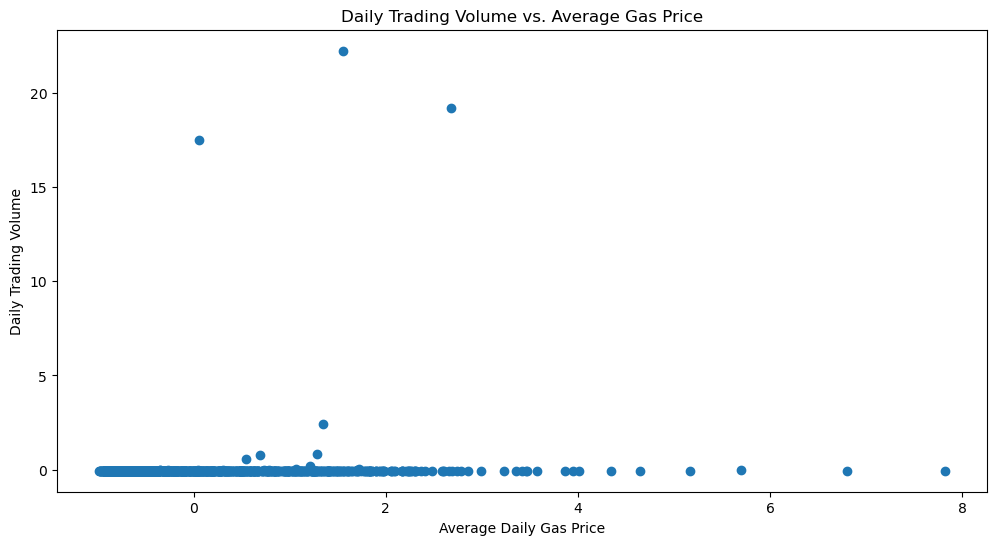

In [10]:

from scipy.stats import zscore

# Investigate the relationship between trading volume and gas prices
# Analyze trading volume over time
daily_volume = curve_trx_from_to_cleaned['value'].resample('D').sum()
average_daily_gas_price = curve_trx_from_to_cleaned['gasPrice'].resample('D').mean()
# Standardizing the data
daily_volume_standardized = zscore(daily_volume)
average_daily_gas_price_standardized = zscore(average_daily_gas_price)

plt.figure(figsize=(12, 6))
plt.scatter(average_daily_gas_price_standardized, daily_volume_standardized)
plt.title('Daily Trading Volume vs. Average Gas Price')
plt.xlabel('Average Daily Gas Price')
plt.ylabel('Daily Trading Volume')
plt.show()


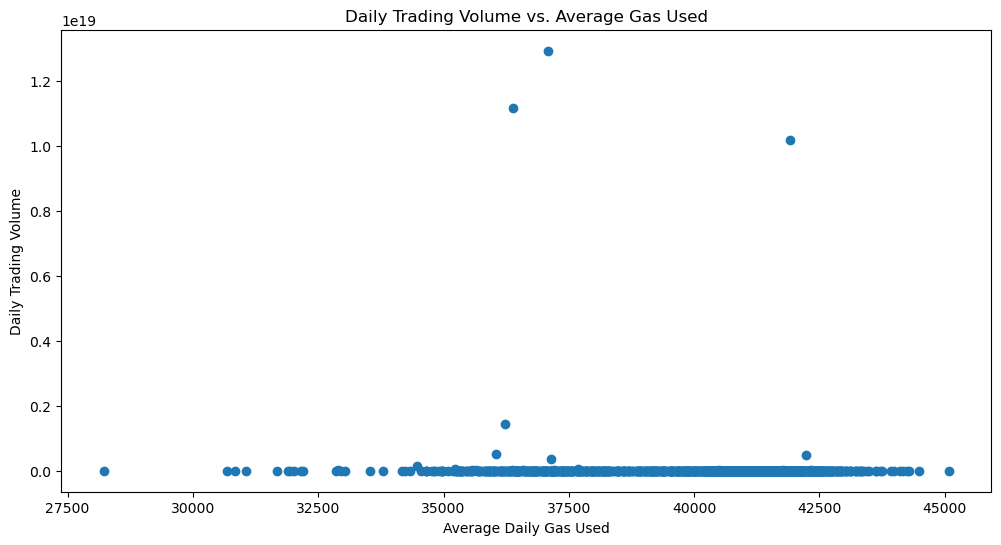

In [11]:
# Inferring Liquidity
# We use gas used as a proxy to infer liquidity trends
average_daily_gas_used = curve_trx_from_to_cleaned['gasUsed'].resample('D').mean()

plt.figure(figsize=(12, 6))
plt.scatter(average_daily_gas_used, daily_volume)
plt.title('Daily Trading Volume vs. Average Gas Used')
plt.xlabel('Average Daily Gas Used')
plt.ylabel('Daily Trading Volume')
plt.show()